https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/download

Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.dummy import DummyClassifier        
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# read the data
df = pd.read_excel("Desktop/Python_ML/cardio.xlsx")
df.sample(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
58010,82780,18910,2,175,65.0,150,80,1,1,0,0,1,1
1651,2330,14785,1,168,65.0,120,80,1,1,0,0,1,0
22865,32661,18941,1,168,65.0,120,80,1,1,0,0,0,0


In [3]:
#check the number of rows and columns
df.shape

(70000, 13)

In [4]:
#find out what are the datatypes, do we have null values, what is the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
#optimize memory usage
df['smoke'] = df['smoke'].astype('int8')
df['alco'] = df['alco'].astype('int8')
df['active'] = df['active'].astype('int8')
df['cardio'] = df['cardio'].astype('int8')
df['cholesterol'] = df['cholesterol'].astype('int8')
df['gluc'] = df['gluc'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int8
gluc           70000 non-null int8
smoke          70000 non-null int8
alco           70000 non-null int8
active         70000 non-null int8
cardio         70000 non-null int8
dtypes: float64(1), int64(6), int8(6)
memory usage: 4.1 MB


In [6]:
#create a new variable
df['age_years'] = df['age']/365
df['age_years'] = df['age_years'].round(decimals=2)
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
54343,77513,22748,1,152,69.0,140,90,1,1,0,0,1,1,62.32
3236,4560,19165,2,170,80.0,120,80,1,1,1,1,1,0,52.51
49281,70366,20529,2,158,64.0,120,70,1,1,0,1,1,0,56.24
52578,75004,18500,1,164,56.0,100,70,2,1,0,0,1,0,50.68
15015,21465,16901,2,173,77.0,150,70,1,1,0,0,1,1,46.30


In [7]:
#set an id column as an index
df.set_index('id',inplace=True)

In [8]:
#rename columns
df.columns = ['age_days', 'gender', 'height', 'weight', 'pressure_sys', 'pressure_dias', 'cholesterol',
             'glucose', 'smoking', 'alcohol', 'active', 'cardio_target', 'age_years'] 
df.head()

,age_days,gender,height,weight,pressure_sys,pressure_dias,cholesterol,glucose,smoking,alcohol,active,cardio_target,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87


In [9]:
#check if there are any strange values in pressure columns
pressure_neg = df [ (df['pressure_sys'] < 0) | (df['pressure_dias'] < 0) ]
len(pressure_neg.index)

8

In [10]:
#delete observations with unrealistic pressure values
df.drop(df[(df['pressure_sys'] < 0) | (df['pressure_dias'] < 0)].index, inplace=True)
df.shape

(69992, 13)

In [11]:
#check if there are categorical variables which need for example encoding
cat_feats = df.select_dtypes(include=[np.object]).columns
cat_feats

Index([], dtype='object')

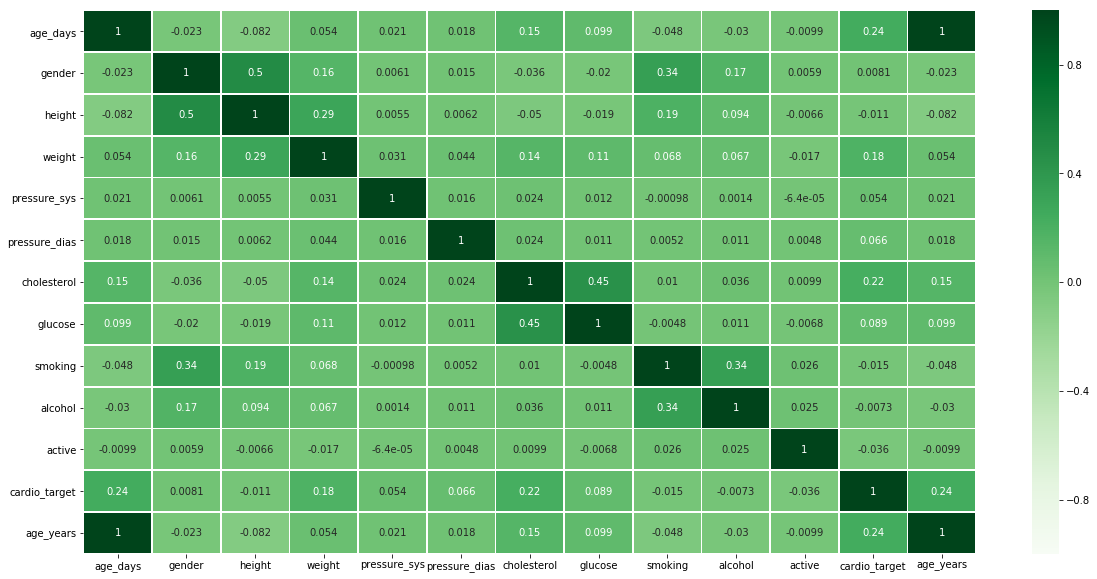

In [12]:
#correlation - looking for patterns, inspo for feature engineering, plots
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(df.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="Greens");

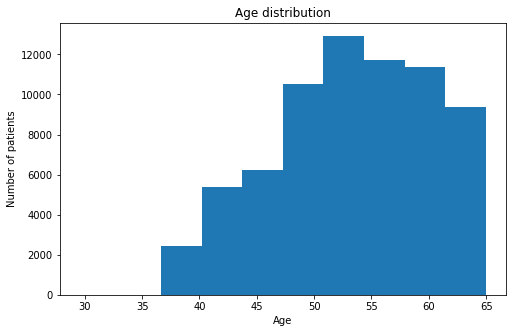

In [13]:
df['age_years'].plot(kind='hist', figsize=(8, 5))

plt.title('Age distribution')
plt.ylabel('Number of patients') 
plt.xlabel('Age')

plt.show()

In [14]:
#create bins for easier interpretation
def height_bins(row):
    if row['height'] > 0 and row['height']   <=  90: return '0-90'
    if row['height'] > 90 and row['height']  <= 125: return '90-80'
    if row['height'] > 125 and row['height'] <= 160: return '125-160'
    if row['height'] > 160 and row['height'] <= 195: return '160-195'
    if row['height'] > 195 and row['height'] <= 230: return '195-230'
    return '230-250'

df['height_bins'] = df [ ['height']].apply(height_bins, axis = 1)

df.sample(3)

,age_days,gender,height,weight,pressure_sys,pressure_dias,cholesterol,glucose,smoking,alcohol,active,cardio_target,age_years,height_bins
id,,,,,,,,,,,,,,
31865,19640,1,153,62.0,110,70,1,1,0,0,0,0,53.81,125-160
20230,14694,1,156,110.0,130,80,1,1,0,0,1,0,40.26,125-160
77443,18821,1,166,58.0,90,60,2,1,0,0,1,0,51.56,160-195


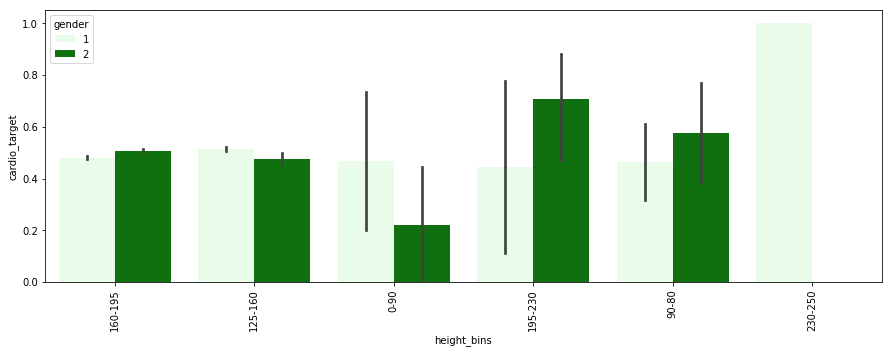

In [16]:
# plotting height bins and gender (quite strong corr)
plt.figure(figsize=(15, 5))
sns.barplot(x='height_bins', y="cardio_target", hue='gender', data=df, color = 'green')
plt.xticks(rotation=90);

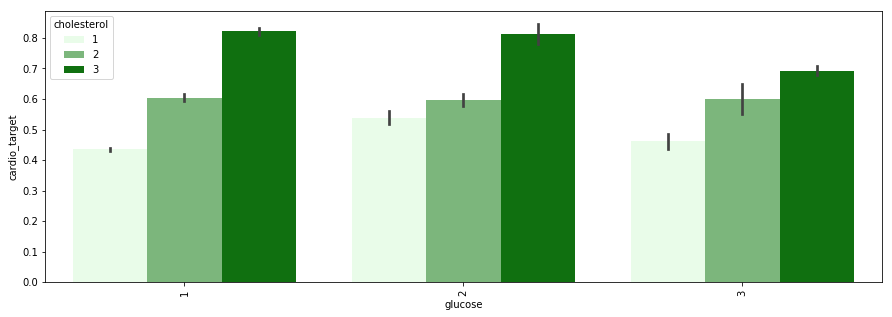

In [17]:
# plotting glucose and cholesterol results (quite strong corr)
plt.figure(figsize=(15, 5))
sns.barplot(x="glucose", y="cardio_target", hue='cholesterol', data=df, color = 'green')
plt.xticks(rotation=90);

In [42]:
#find a mean value for observations grouped by choosen features
df.groupby('height_bins')['alcohol', 'glucose', 'pressure_sys', 'pressure_dias'].mean().round(decimals=2)

,alcohol,glucose,pressure_sys,pressure_dias
height_bins,,,,
0-90,0.04,1.08,119.46,77.71
125-160,0.03,1.24,128.26,96.74
160-195,0.06,1.22,129.15,96.58
195-230,0.12,1.15,128.65,120.73
230-250,0.00,1.00,140.00,100.00
90-80,0.03,1.18,123.01,93.28


In [18]:
#define function in order to reuse it when building different models
def train_and_predict_model(X_train, X_test, y_train, y_test, model, success_metric=accuracy_score):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Distribution:")
    print( pd.Series(y_pred).value_counts() )
    
    return success_metric(y_test, y_pred)

In [19]:
#define model input and split observation into train and test
X = df[['pressure_sys', 'active', 'weight','smoking', 'cholesterol', 'gender']].values
y = df['cardio_target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (48994, 6) (48994,)
Test: (20998, 6) (20998,)


In [27]:
#first model
train_and_predict_model(X_train, X_test, y_train, y_test, DummyClassifier())

Distribution:
0    10583
1    10415
dtype: int64


0.5023335555767215

In [28]:
#second model
train_and_predict_model(X_train, X_test, y_train, y_test, LogisticRegression(solver='lbfgs', max_iter=300))

Distribution:
0    11924
1     9074
dtype: int64


0.7224021335365273

In [29]:
#third model
train_and_predict_model(X_train, X_test, y_train, y_test, DecisionTreeClassifier())

Distribution:
0    12356
1     8642
dtype: int64


0.7005905324316601